In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 

In [7]:
df=pd.read_csv("final_data_capstone.csv")
df.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_util,mort_acc,pub_rec_bankruptcies,target,application_type_Joint App,credit_history,creditline_ratio,emi,avg_fico,balance_income
0,3600.0,36.0,13.99,123.03,5.0,10.0,4.0,55000.0,0.0,2,...,29.7,1.0,0.0,0.0,0,4505 days,0.538462,754956.36,677.0,0.065455
1,24700.0,36.0,11.99,820.28,5.0,10.0,4.0,65000.0,0.0,11,...,19.2,4.0,0.0,0.0,0,5844 days,0.578947,3847027.47,717.0,0.380000
2,20000.0,60.0,10.78,432.66,6.0,10.0,4.0,63000.0,0.0,4,...,56.2,5.0,0.0,0.0,1,5600 days,0.333333,2539768.00,697.0,0.317460


In [8]:
df.shape

(1344976, 23)

In [ ]:
df['credit_history'] = df['credit_history'].str.replace('r'D')

In [9]:
train=df.sample(frac=0.02)
train.shape

(26900, 23)

In [10]:
train.target.value_counts(normalize=True)

0.0    0.803086
1.0    0.196914
Name: target, dtype: float64

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [12]:
X=df.drop(['target'],axis=1)
y=df.target

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [13]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Specs','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features


#Selecting features above 1500 score!

ValueError: could not convert string to float: '3074 days'

In [ ]:
1. Include purpose,employee_length
2.List of cat var ,woe encoding
#  https://contrib.scikit-learn.org/category_encoders/woe.html

In [9]:
drop_columns=['pub_rec','pub_rec_bankruptcies','emp_length','credit_history','revol_bal','purpose','balance_income','application_type_Joint App']

In [10]:
train.drop(columns=drop_columns,inplace=True,axis=1)
train.shape

(26900, 14)

In [11]:
X=train.drop(['target'],axis=1)
y=train.target

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [12]:
X_train.shape,X_test.shape

((18830, 13), (8070, 13))

In [15]:
# Separate majority and minority classes
df_majority = train[train.target == 0]
df_minority = train[train.target == 1]

print(df_majority.target.count())
print("-----------")
print(df_minority.target.count())
print("-----------")
print(train.target.value_counts())

21603
-----------
5297
-----------
0.0    21603
1.0     5297
Name: target, dtype: int64


<AxesSubplot:title={'center':'Class count after Upsampling'}>

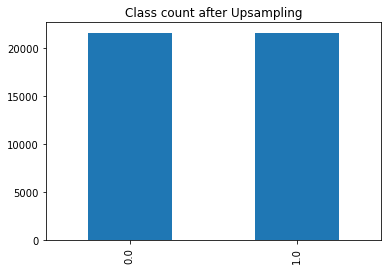

In [18]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 21522,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
plt.title('Class count after Upsampling')
df_upsampled.target.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Class count after Downsampling'}>

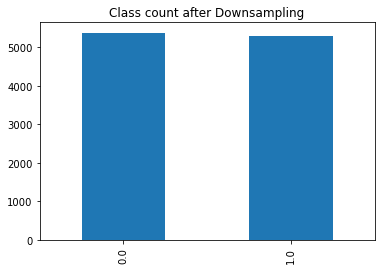

In [19]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5378,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
plt.title('Class count after Downsampling')
df_downsampled.target.value_counts().plot(kind='bar')

In [16]:
X = train.drop(['target'], axis=1)  
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y, random_state=2)

In [20]:
sm = SMOTE(random_state=40)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

ValueError: could not convert string to float: '3074 days'

In [18]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    
    plt.show()

In [ ]:
    importances = algo.feature_importances_
    indices = np.argsort(importances)
    features = Xtrain.columns
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# LR

In [22]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, 15)}
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression(solver='liblinear')
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(i,j)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned Logistic Regression Parameters: {'C': 100000000.0}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
____________________________________________________________________________________________________


In [23]:
param_log=[{'C': 100000000.0},{'C': 0.0007196856730011522},{'C': 3.727593720314938},{'C': 3.727593720314938}]

In [ ]:
# param_log=[{'C': 0.05179474679231213},{'C': 8.483428982440725e-05},{'C': 0.0007196856730011522},{'C': 8.483428982440725e-05}]
#0.05

In [5]:
Tuned Logistic Regression Parameters: {'C': 100000000.0},solver='liblinear'

SyntaxError: invalid syntax (<ipython-input-5-3dcbce00f4b1>, line 1)

Data is  Normal Sampling  And with hyper parameter  {'C': 100000000.0}
Overall Train Accuracy 0.8008100760139821
Train AUC Score 0.6959042645537719
Overall Test Accuracy 0.8000450602681086
Test AUC Score 0.7027463003875123
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      7102
         1.0       0.50      0.01      0.01      1775

    accuracy                           0.80      8877
   macro avg       0.65      0.50      0.45      8877
weighted avg       0.74      0.80      0.71      8877

K-Fold scores: 0.523 (+/- 0.00003)


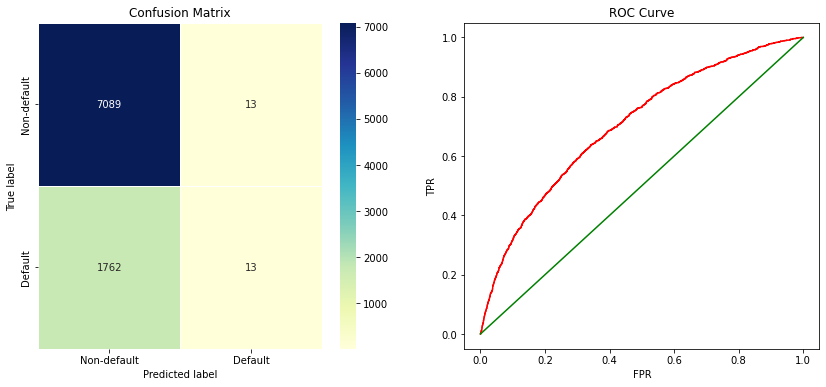

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 0.0007196856730011522}
Overall Train Accuracy 0.6495446519840163
Train AUC Score 0.7122119735261203
Overall Test Accuracy 0.6779317336938154
Test AUC Score 0.7160646673620998
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.69      0.78      7102
         1.0       0.33      0.61      0.43      1775

    accuracy                           0.68      8877
   macro avg       0.61      0.65      0.60      8877
weighted avg       0.77      0.68      0.71      8877

K-Fold scores: 0.650 (+/- 0.00000)


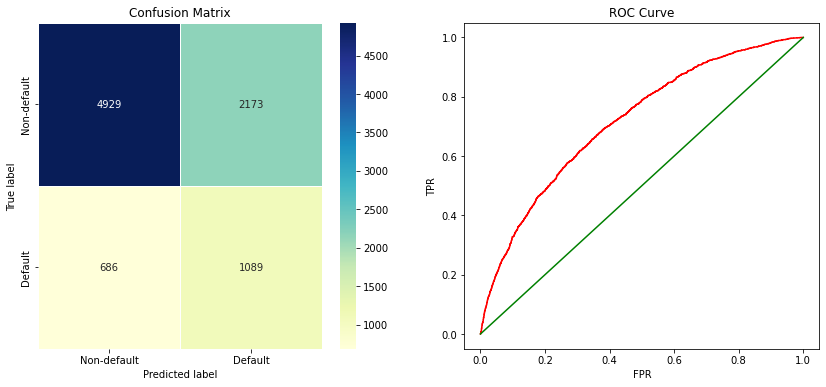

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'C': 3.727593720314938}
Overall Train Accuracy 0.6497768687244329
Train AUC Score 0.7089498751231031
Overall Test Accuracy 0.6762419736397431
Test AUC Score 0.7162124535441317
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.69      0.77      7102
         1.0       0.33      0.62      0.43      1775

    accuracy                           0.68      8877
   macro avg       0.61      0.65      0.60      8877
weighted avg       0.77      0.68      0.71      8877

K-Fold scores: 0.644 (+/- 0.00020)


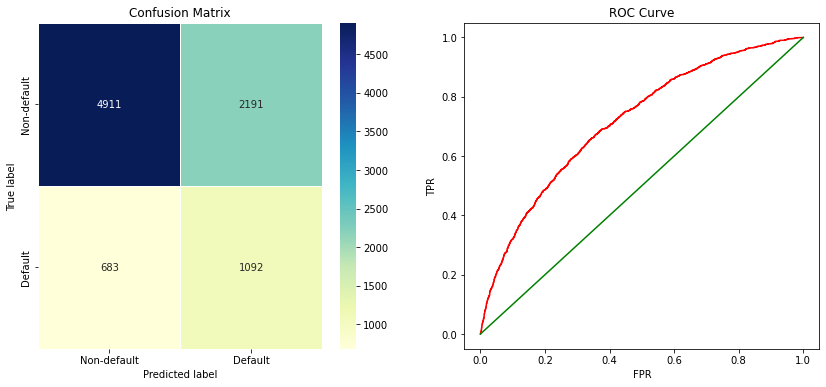

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'C': 3.727593720314938}
Overall Train Accuracy 0.6532246879334258
Train AUC Score 0.7193404137034208
Overall Test Accuracy 0.6835642672073898
Test AUC Score 0.7142187283090262
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      7102
         1.0       0.34      0.60      0.43      1775

    accuracy                           0.68      8877
   macro avg       0.61      0.65      0.61      8877
weighted avg       0.77      0.68      0.71      8877

K-Fold scores: 0.655 (+/- 0.00000)


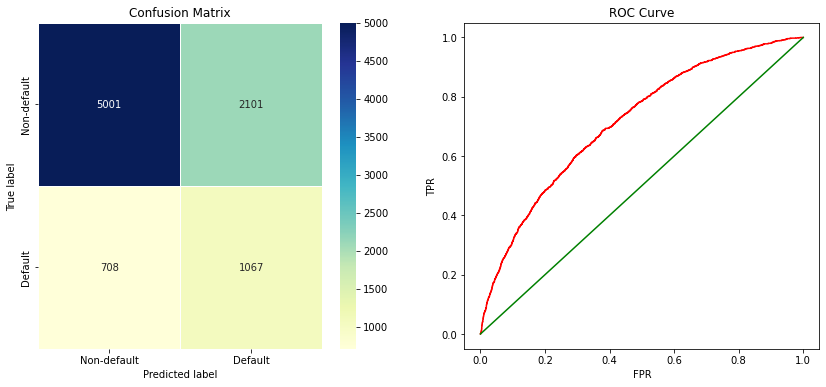

____________________________________________________________


In [24]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42,solver='liblinear'), i,j,X_test,y_test)
    print("_" * 60)


# NB

Data is  Normal Sampling
Overall Train Accuracy 0.7435499084503134
Train AUC Score 0.6981113943034835
Overall Test Accuracy 0.7600540723217303
Test AUC Score 0.7117420603599067
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7102
         1.0       0.41      0.43      0.42      1775

    accuracy                           0.76      8877
   macro avg       0.63      0.64      0.63      8877
weighted avg       0.77      0.76      0.76      8877

K-Fold scores: 0.621 (+/- 0.00011)


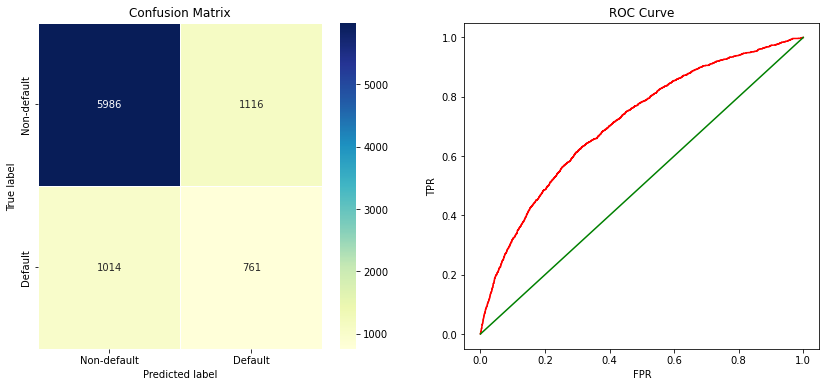

____________________________________________________________
Data is  Over Sampling
Overall Train Accuracy 0.6488709227766937
Train AUC Score 0.7044501227258885
Overall Test Accuracy 0.6525853328827307
Test AUC Score 0.7124491018201577
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.65      0.75      7102
         1.0       0.32      0.65      0.43      1775

    accuracy                           0.65      8877
   macro avg       0.60      0.65      0.59      8877
weighted avg       0.77      0.65      0.69      8877

K-Fold scores: 0.650 (+/- 0.00001)


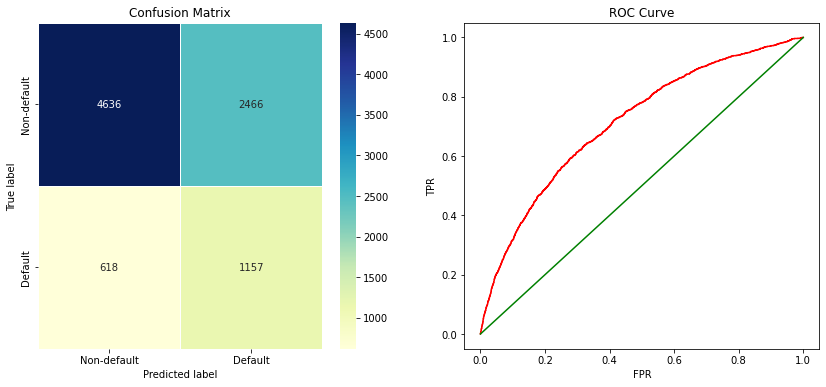

____________________________________________________________
Data is  Under Sampling
Overall Train Accuracy 0.6458720714020082
Train AUC Score 0.7026627773357594
Overall Test Accuracy 0.6809733017911457
Test AUC Score 0.7133772276010328
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      7102
         1.0       0.34      0.62      0.44      1775

    accuracy                           0.68      8877
   macro avg       0.61      0.66      0.61      8877
weighted avg       0.77      0.68      0.71      8877

K-Fold scores: 0.646 (+/- 0.00019)


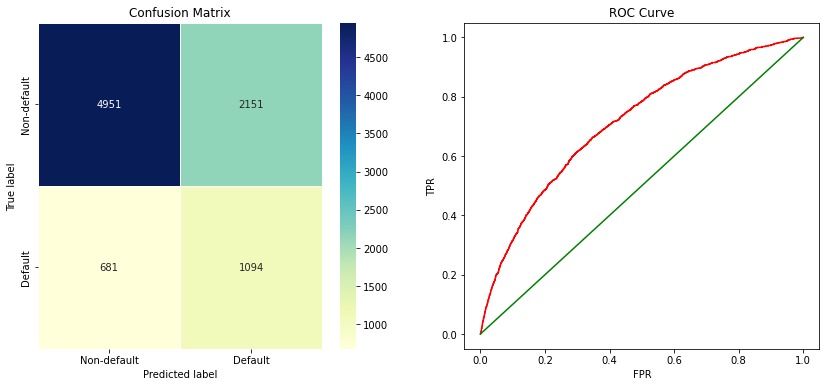

____________________________________________________________
Data is  SMOTE
Overall Train Accuracy 0.6779819694868239
Train AUC Score 0.7339391612050608
Overall Test Accuracy 0.6249859186662161
Test AUC Score 0.702767004731855
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.89      0.61      0.72      7102
         1.0       0.31      0.69      0.42      1775

    accuracy                           0.62      8877
   macro avg       0.60      0.65      0.57      8877
weighted avg       0.77      0.62      0.66      8877

K-Fold scores: 0.678 (+/- 0.00006)


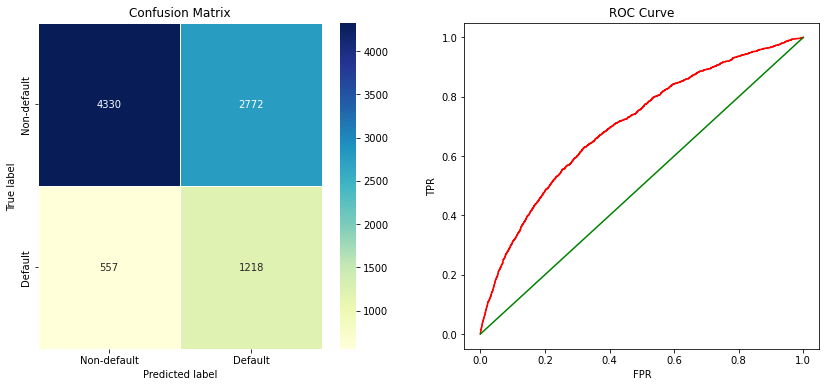

____________________________________________________________


In [25]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    b = ss.transform(X_test)
    model_eval(GaussianNB(), xts,j,b,y_test)
    print("_" * 60)

# KNN

In [26]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']


for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    best_knn = []
    print('Data is ',k) # Instantiate a KNN classifier: tree
    knn = KNeighborsClassifier()
    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_neighbors' : sp_randint(1,20),
             'p': sp_randint(1,5)}
    rsearch_knn = RandomizedSearchCV(knn, param_distributions = params, cv = 3, random_state = 3 , n_iter = 50,n_jobs = -1)
    rsearch_knn.fit(xts,j)
    best_knn.append(rsearch_knn.best_params_)
    print("Tuned KNN Parameters: {}".format(rsearch_knn.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned KNN Parameters: {'n_neighbors': 18, 'p': 3} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned KNN Parameters: {'n_neighbors': 1, 'p': 1} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned KNN Parameters: {'n_neighbors': 18, 'p': 1} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned KNN Parameters: {'n_neighbors': 1, 'p': 1} for SMOTE
____________________________________________________________________________________________________


In [27]:
param_knn = [{'n_neighbors': 18, 'p': 3},{'n_neighbors': 1, 'p': 1},{'n_neighbors': 18, 'p': 1},{'n_neighbors': 1, 'p': 1}] 
#0.02

Data is  Normal Sampling  And with hyper parameter  {'n_neighbors': 18, 'p': 3}
Overall Train Accuracy 0.8074682350330133
Train AUC Score 0.7587347363866528
Overall Test Accuracy 0.7992565055762082
Test AUC Score 0.6742274146144114
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      7102
         1.0       0.49      0.09      0.15      1775

    accuracy                           0.80      8877
   macro avg       0.65      0.53      0.52      8877
weighted avg       0.75      0.80      0.74      8877

K-Fold scores: 0.526 (+/- 0.00001)


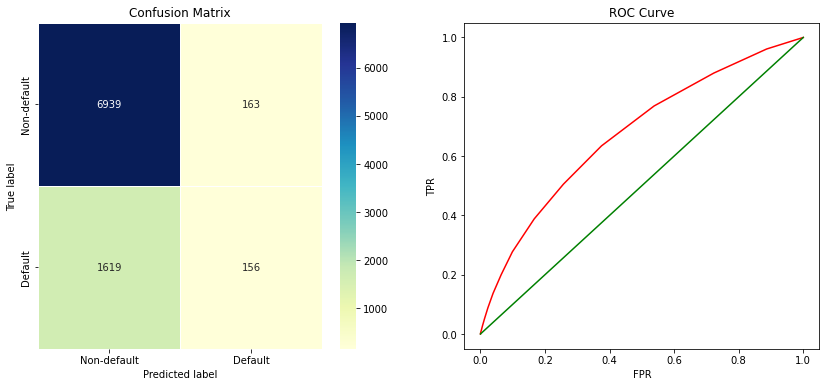

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'n_neighbors': 1, 'p': 1}
Overall Train Accuracy 1.0
Train AUC Score 1.0
Overall Test Accuracy 0.9983102399459277
Test AUC Score 0.995774647887324
Classification Report of Test
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7102
         1.0       1.00      0.99      1.00      1775

    accuracy                           1.00      8877
   macro avg       1.00      1.00      1.00      8877
weighted avg       1.00      1.00      1.00      8877

K-Fold scores: 0.883 (+/- 0.00001)


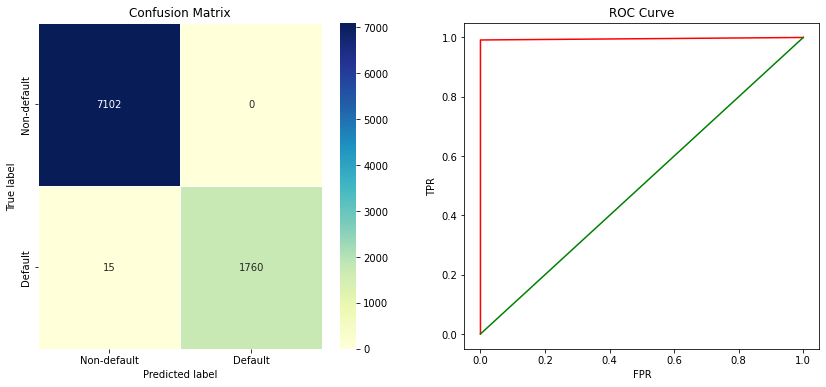

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'n_neighbors': 18, 'p': 1}
Overall Train Accuracy 0.6779471922647824
Train AUC Score 0.7458576744974672
Overall Test Accuracy 0.6779317336938154
Test AUC Score 0.7260806120870534
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.69      0.77      7102
         1.0       0.34      0.64      0.44      1775

    accuracy                           0.68      8877
   macro avg       0.61      0.66      0.61      8877
weighted avg       0.77      0.68      0.71      8877

K-Fold scores: 0.633 (+/- 0.00006)


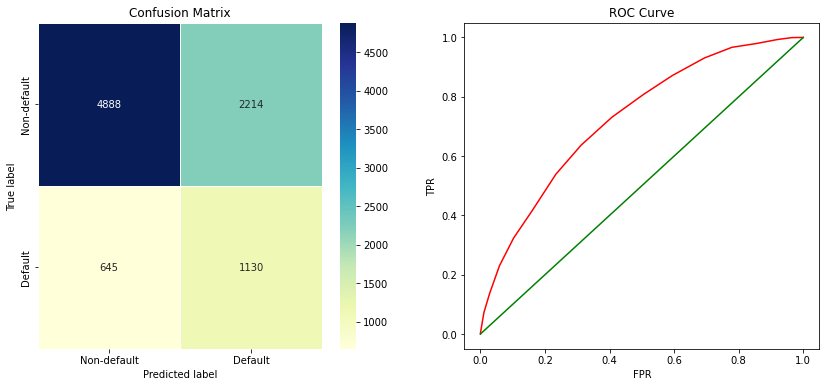

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'n_neighbors': 1, 'p': 1}
Overall Train Accuracy 1.0
Train AUC Score 1.0
Overall Test Accuracy 0.6974202996507829
Test AUC Score 0.559466288012502
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      7102
         1.0       0.28      0.33      0.30      1775

    accuracy                           0.70      8877
   macro avg       0.55      0.56      0.56      8877
weighted avg       0.72      0.70      0.71      8877

K-Fold scores: 0.842 (+/- 0.00003)


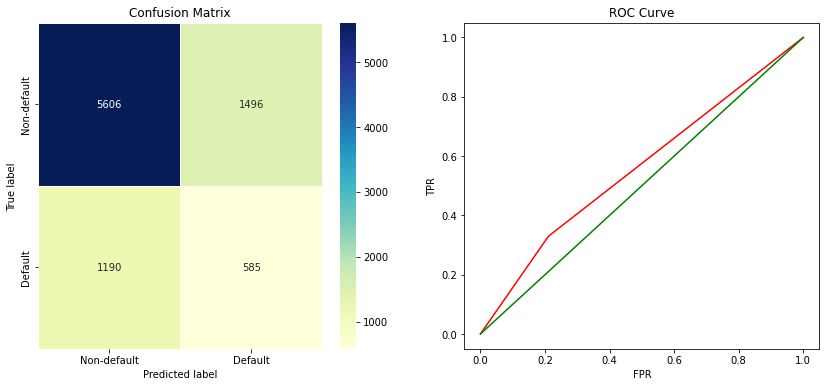

____________________________________________________________


In [28]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_knn[l])
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    b = ss.transform(X_test)
    model_eval(KNeighborsClassifier(**param_knn[l]), xts,j,b,y_test)
    print("_" * 60)

# DT

In [29]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(i,j)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",name)
    print("_" * 100) 

Data is  Normal Sampling
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 12} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 19} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 36} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Decision Tree Parameters: {'criterion': 

In [30]:
param_dt=[{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 12},{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 19},
         {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 36},{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 19}]

In [ ]:
# param_dt = [{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 17, 'min_samples_split': 15},{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 8},
#             {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 28},{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 35}]

#0.05

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 12}
Overall Train Accuracy 0.8043610941574655
Train AUC Score 0.7122896218785163
Overall Test Accuracy 0.8026360256843528
Test AUC Score 0.6947053200645721
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      7102
         1.0       0.55      0.07      0.12      1775

    accuracy                           0.80      8877
   macro avg       0.68      0.53      0.50      8877
weighted avg       0.76      0.80      0.73      8877

K-Fold scores: 0.530 (+/- 0.00004)


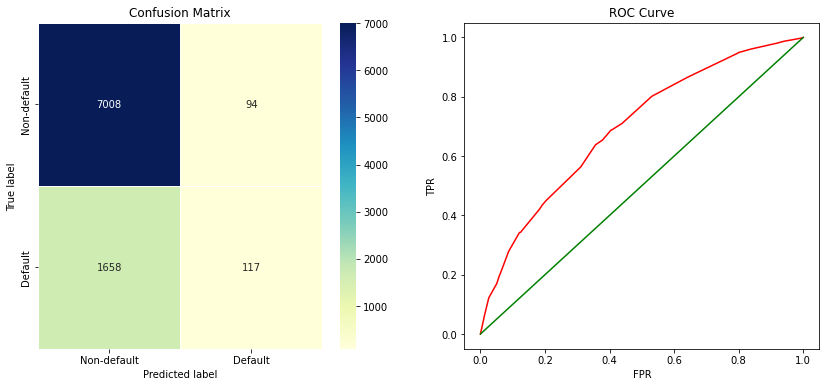

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 19}
Overall Train Accuracy 0.880262057429607
Train AUC Score 0.958014596026165
Overall Test Accuracy 0.8405993015658443
Test AUC Score 0.9423417724029335
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      7102
         1.0       0.56      0.88      0.69      1775

    accuracy                           0.84      8877
   macro avg       0.77      0.86      0.79      8877
weighted avg       0.89      0.84      0.85      8877

K-Fold scores: 0.771 (+/- 0.00003)


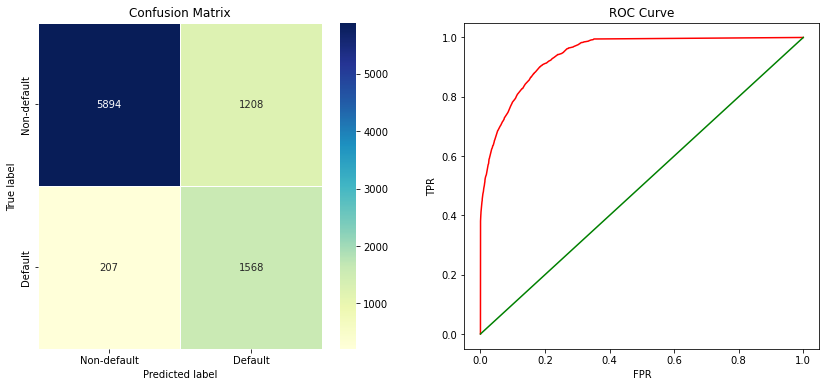

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 11, 'min_samples_split': 36}
Overall Train Accuracy 0.6409445890665675
Train AUC Score 0.7036819703042062
Overall Test Accuracy 0.5758702264278472
Test AUC Score 0.7074742683076776
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.90      0.53      0.67      7102
         1.0       0.29      0.76      0.42      1775

    accuracy                           0.58      8877
   macro avg       0.59      0.65      0.54      8877
weighted avg       0.78      0.58      0.62      8877

K-Fold scores: 0.638 (+/- 0.00014)


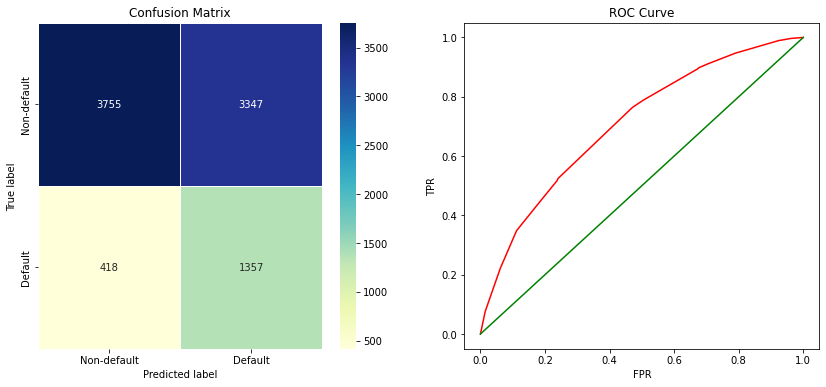

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 19}
Overall Train Accuracy 0.8423023578363384
Train AUC Score 0.9126773258554057
Overall Test Accuracy 0.7833727610679283
Test AUC Score 0.6878250522566546
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      7102
         1.0       0.44      0.30      0.35      1775

    accuracy                           0.78      8877
   macro avg       0.64      0.60      0.61      8877
weighted avg       0.76      0.78      0.77      8877

K-Fold scores: 0.836 (+/- 0.00002)


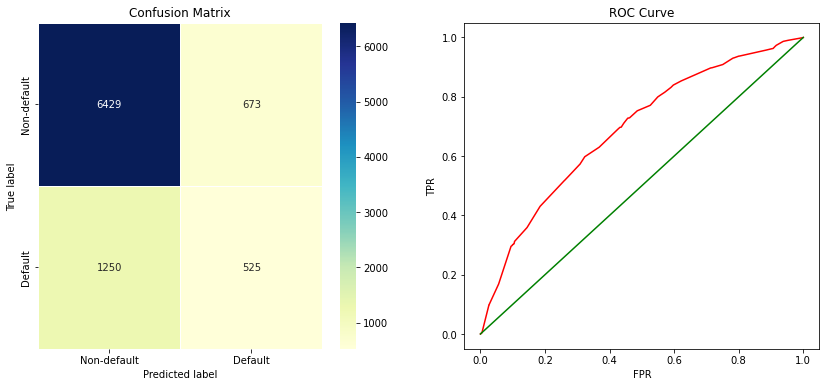

____________________________________________________________


In [31]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(DecisionTreeClassifier(**param_dt[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

# RF

In [32]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',k)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,13),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 200,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(i,j)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 63} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 12, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 69} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 196} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 

In [28]:
param_rf =[{'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 63},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 12, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 69},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 196},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 192}
          ]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 63}
Overall Train Accuracy 0.8058591799367475
Train AUC Score 0.7717890435009067
Overall Test Accuracy 0.8027486763546243
Test AUC Score 0.6946323156898168
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      7114
         1.0       0.63      0.02      0.03      1763

    accuracy                           0.80      8877
   macro avg       0.72      0.51      0.46      8877
weighted avg       0.77      0.80      0.72      8877

K-Fold scores: 0.505 (+/- 0.00000)


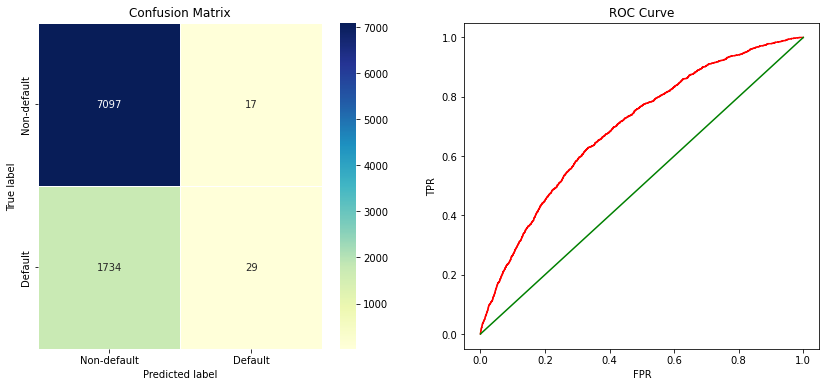

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 9, 'max_features': 12, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 69}
Overall Train Accuracy 0.7505164689770433
Train AUC Score 0.834064213212206
Overall Test Accuracy 0.7145432015320491
Test AUC Score 0.8114723813189973
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      7114
         1.0       0.39      0.75      0.51      1763

    accuracy                           0.71      8877
   macro avg       0.65      0.73      0.65      8877
weighted avg       0.81      0.71      0.74      8877

K-Fold scores: 0.717 (+/- 0.00002)


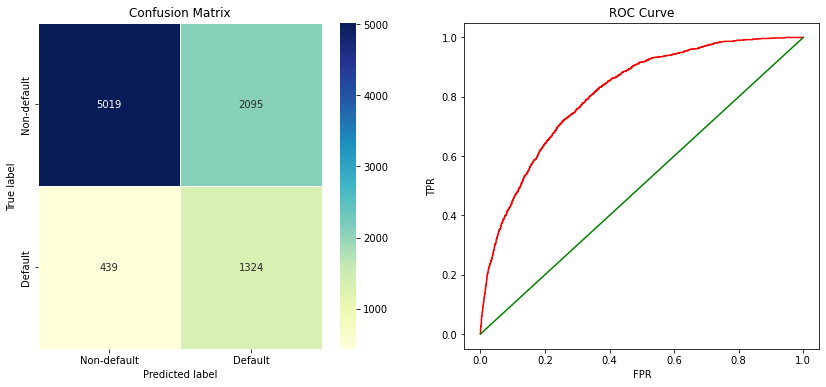

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 196}
Overall Train Accuracy 0.7109805019124918
Train AUC Score 0.7946887988531363
Overall Test Accuracy 0.6463895460177989
Test AUC Score 0.7509494113450331
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.90      0.63      0.74      7114
         1.0       0.33      0.73      0.45      1763

    accuracy                           0.65      8877
   macro avg       0.61      0.68      0.59      8877
weighted avg       0.79      0.65      0.68      8877

K-Fold scores: 0.655 (+/- 0.00008)


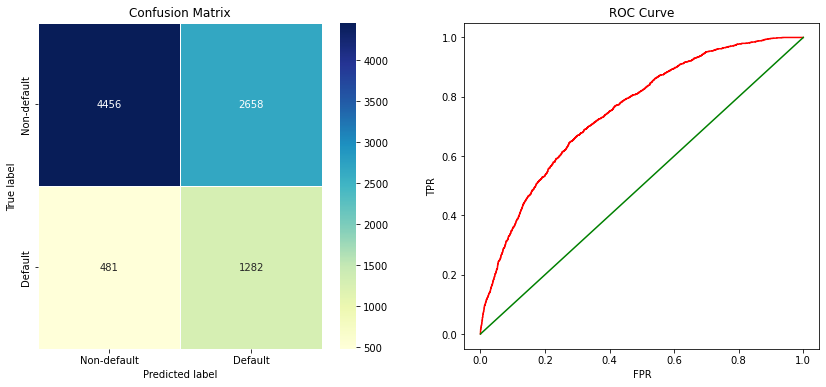

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 192}
Overall Train Accuracy 0.859190031152648
Train AUC Score 0.9331818030962384
Overall Test Accuracy 0.7706432353272502
Test AUC Score 0.6903234273498399
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      7114
         1.0       0.39      0.27      0.32      1763

    accuracy                           0.77      8877
   macro avg       0.61      0.58      0.59      8877
weighted avg       0.74      0.77      0.75      8877

K-Fold scores: 0.849 (+/- 0.00001)


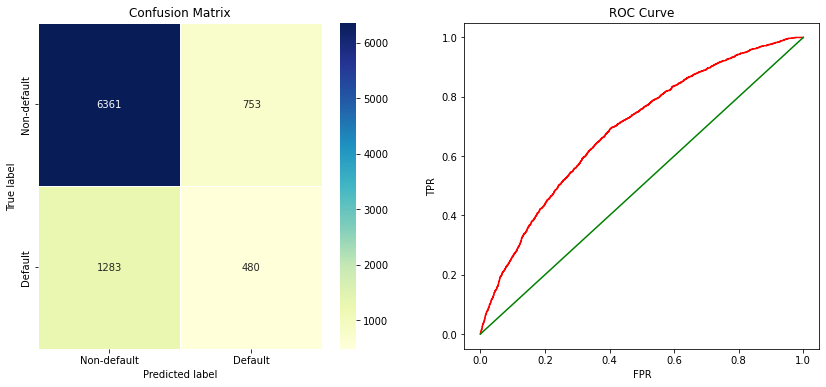

____________________________________________________________


In [31]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_rf[l])
    model_eval(RandomForestClassifier(**param_rf[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

# AdaBoost

In [32]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_ada
    best_ada =[]
    print('Data is ',k)
    # Instantiate a Ada Boost classifier
    ada = AdaBoostClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_ada = GridSearchCV(ada, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)

    #Fitting the grid to the training data
    grid_ada.fit(i,j)
    best_ada.append(grid_ada.best_params_)
    print("Tuned Ada Boost Parameters: {}".format(grid_ada.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Ada Boost Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Ada Boost Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300} for SMOTE
____________________________________________________________________________________________________


In [33]:
param_ada=[{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300},{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300},
           {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300},{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}
          ]

In [34]:
# param_ada=[{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200},{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200},
#            {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300},{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}]
#0.05

Data is  Normal Sampling  And with hyper parameter  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300}
Overall Train Accuracy 0.8031404316706431
Train AUC Score 0.7155801646189426
Overall Test Accuracy 0.801058916300552
Test AUC Score 0.694541261500774
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      7114
         1.0       0.49      0.05      0.10      1763

    accuracy                           0.80      8877
   macro avg       0.65      0.52      0.49      8877
weighted avg       0.75      0.80      0.73      8877

K-Fold scores: 0.518 (+/- 0.00004)


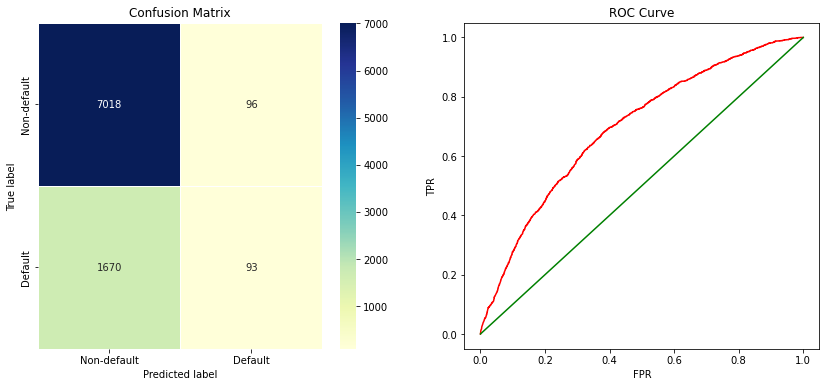

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}
Overall Train Accuracy 0.6706900954016852
Train AUC Score 0.7335268380609649
Overall Test Accuracy 0.6524726822124591
Test AUC Score 0.7219710967532883
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.89      0.64      0.75      7114
         1.0       0.32      0.69      0.44      1763

    accuracy                           0.65      8877
   macro avg       0.61      0.66      0.59      8877
weighted avg       0.78      0.65      0.69      8877

K-Fold scores: 0.662 (+/- 0.00005)


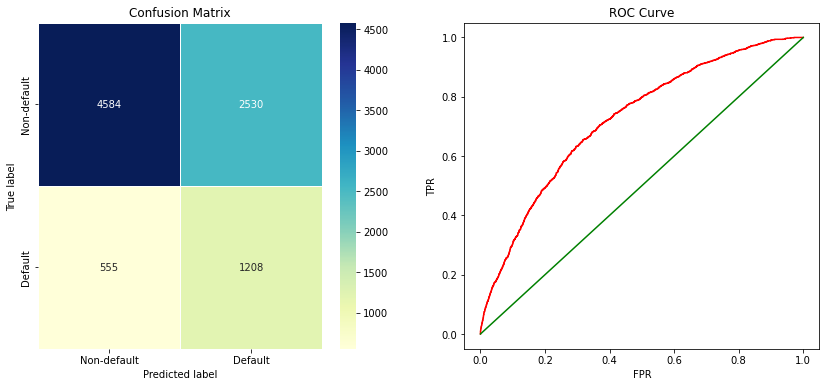

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300}
Overall Train Accuracy 0.6620953447149921
Train AUC Score 0.7179229121340007
Overall Test Accuracy 0.6288160414554467
Test AUC Score 0.7013963981131531
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.89      0.61      0.73      7114
         1.0       0.31      0.69      0.43      1763

    accuracy                           0.63      8877
   macro avg       0.60      0.65      0.58      8877
weighted avg       0.77      0.63      0.67      8877

K-Fold scores: 0.657 (+/- 0.00014)


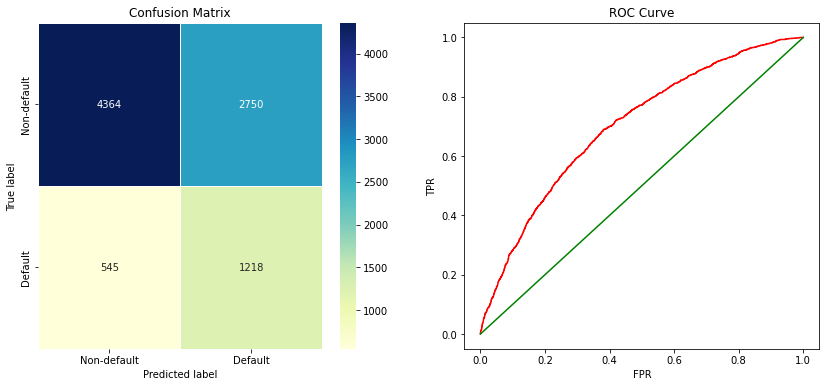

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}
Overall Train Accuracy 0.8682589131187262
Train AUC Score 0.9264232061048214
Overall Test Accuracy 0.7930607187112764
Test AUC Score 0.6965437759358927
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      7114
         1.0       0.43      0.13      0.20      1763

    accuracy                           0.79      8877
   macro avg       0.62      0.54      0.54      8877
weighted avg       0.74      0.79      0.75      8877

K-Fold scores: 0.865 (+/- 0.00004)


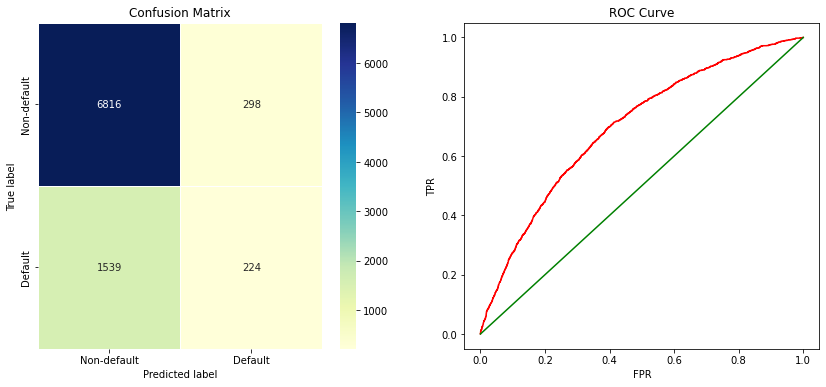

____________________________________________________________


In [35]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_ada[l])
    model_eval(AdaBoostClassifier(**param_ada[l]), i,j,X_test,y_test)
    print("_" * 60)

# GBC

In [36]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_gbc
    best_gbc =[]
    print('Data is ',k)
    # Instantiate a Gradient Boost classifier
    gbc = GradientBoostingClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_gbc = GridSearchCV(gbc, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)

    #Fitting the grid to the training data
    grid_gbc.fit(i,j)
    best_gbc.append(grid_gbc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(grid_gbc.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned Random Tree Parameters: {'learning_rate': 0.5, 'n_estimators': 200} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Random Tree Parameters: {'learning_rate': 1.0, 'n_estimators': 300} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Random Tree Parameters: {'learning_rate': 0.5, 'n_estimators': 200} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Random Tree Parameters: {'learning_rate': 0.5, 'n_estimators': 200} for SMOTE
____________________________________________________________________________________________________


In [37]:
param_gbc=[{'learning_rate': 0.5, 'n_estimators': 200},{'learning_rate': 1.0, 'n_estimators': 300},{'learning_rate': 0.5, 'n_estimators': 200},{'learning_rate': 0.5, 'n_estimators': 200}]

In [38]:
# param_gbc=[{'learning_rate': 0.5, 'n_estimators': 200},{'learning_rate': 0.75, 'n_estimators': 300},{'learning_rate': 0.5, 'n_estimators': 200},{'learning_rate': 0.5, 'n_estimators': 200}]
#0.05

Data is  Normal Sampling  And with hyper parameter  {'learning_rate': 0.5, 'n_estimators': 200}
Overall Train Accuracy 0.857127004383288
Train AUC Score 0.8620132531773242
Overall Test Accuracy 0.7835980624084713
Test AUC Score 0.6651124997627966
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.82      0.94      0.87      7114
         1.0       0.39      0.15      0.22      1763

    accuracy                           0.78      8877
   macro avg       0.60      0.55      0.55      8877
weighted avg       0.73      0.78      0.74      8877

K-Fold scores: 0.543 (+/- 0.00006)


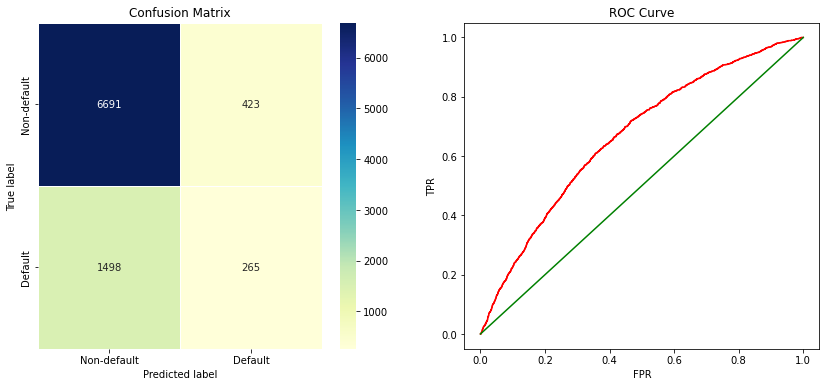

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'learning_rate': 1.0, 'n_estimators': 300}
Overall Train Accuracy 0.8376778626308582
Train AUC Score 0.9154096029740532
Overall Test Accuracy 0.80545229244114
Test AUC Score 0.8899385280572082
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      7114
         1.0       0.51      0.80      0.62      1763

    accuracy                           0.81      8877
   macro avg       0.72      0.80      0.75      8877
weighted avg       0.86      0.81      0.82      8877

K-Fold scores: 0.765 (+/- 0.00002)


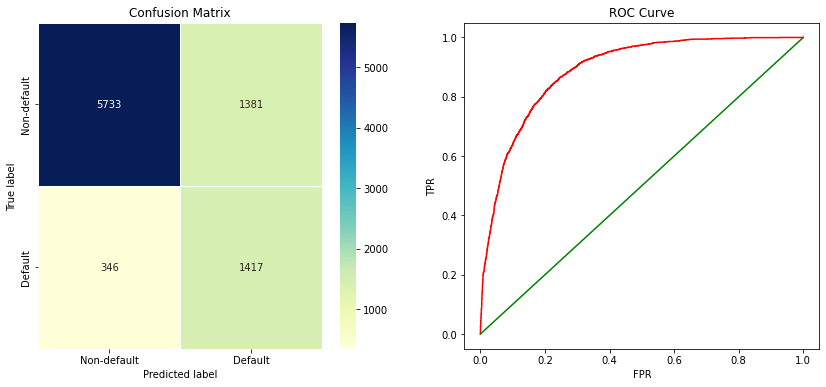

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'learning_rate': 0.5, 'n_estimators': 200}
Overall Train Accuracy 0.8058587554809217
Train AUC Score 0.8875723970332995
Overall Test Accuracy 0.6864931846344485
Test AUC Score 0.7986933006282421
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.93      0.66      0.77      7114
         1.0       0.37      0.81      0.51      1763

    accuracy                           0.69      8877
   macro avg       0.65      0.73      0.64      8877
weighted avg       0.82      0.69      0.72      8877

K-Fold scores: 0.623 (+/- 0.00022)


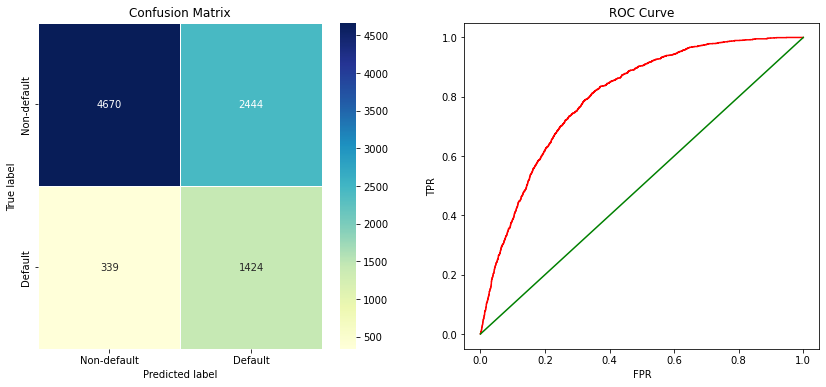

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'learning_rate': 0.5, 'n_estimators': 200}
Overall Train Accuracy 0.9040844582900658
Train AUC Score 0.9618505878218677
Overall Test Accuracy 0.7831474597273854
Test AUC Score 0.6726396194796006
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      7114
         1.0       0.37      0.13      0.20      1763

    accuracy                           0.78      8877
   macro avg       0.59      0.54      0.54      8877
weighted avg       0.73      0.78      0.74      8877

K-Fold scores: 0.864 (+/- 0.00003)


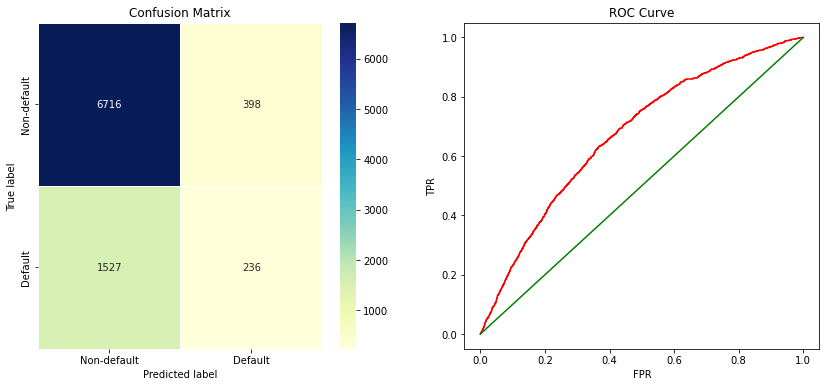

____________________________________________________________


In [39]:
for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_gbc[l])
    model_eval(GradientBoostingClassifier(**param_gbc[l]), i,j,X_test,y_test)
    print("_" * 60)

# XGBC

In [23]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    best_xgb =[]
    print('Data is ',k)  # Instantiate a XGBoost classifier
    xgb= XGBClassifier()

    param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
                  "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [1, 3, 5, 7],
                 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
                 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] }

    #Building a 5 fold CV RandomizedSearchCV object
    xgb_RS = RandomizedSearchCV(xgb, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 200,n_jobs = -1)

    #Fitting the grid to the training data
    xgb_RS.fit(i,j)
    best_xgb.append(xgb_RS.best_params_)
    print("Tuned XG Boost Parameters: {}".format(xgb_RS.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
[11:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XG Boost Parameters: {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
[12:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XG Boost Parameters: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate

In [25]:
param_xgb = [{'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7},
            {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4},
             {'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.3},
             {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.5}
            ]

Data is  Normal Sampling  And with hyper parameter  {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
[13:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.8074682350330133
Train AUC Score 0.7276264431385063
Overall Test Accuracy 0.8011715669708235
Test AUC Score 0.6966594909104346
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      7111
         1.0       0.50      0.04      0.07      1766

    accuracy                           0.80      8877
   macro avg       0.65      0.51      0.48      8877
weighted avg       0.75      0.80      0.73      8877

[13:02:09] WARNING: C:/Use

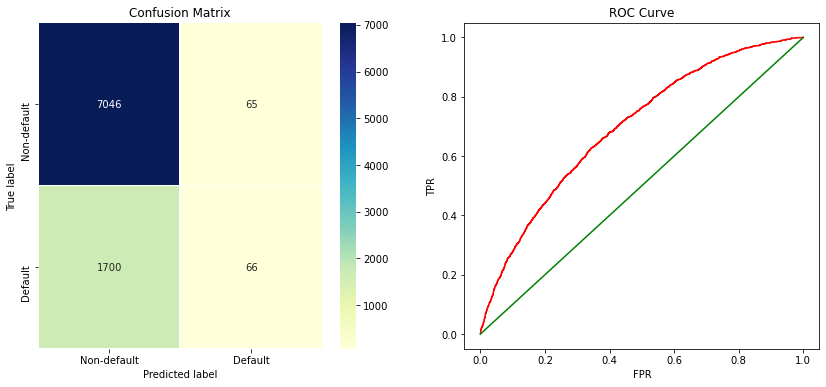

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4}
[13:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 1.0
Train AUC Score 1.0
Overall Test Accuracy 0.9977469865945703
Test AUC Score 0.9988809546978162
Classification Report of Test
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7111
         1.0       1.00      0.99      0.99      1766

    accuracy                           1.00      8877
   macro avg       1.00      0.99      1.00      8877
weighted avg       1.00      1.00      1.00      88

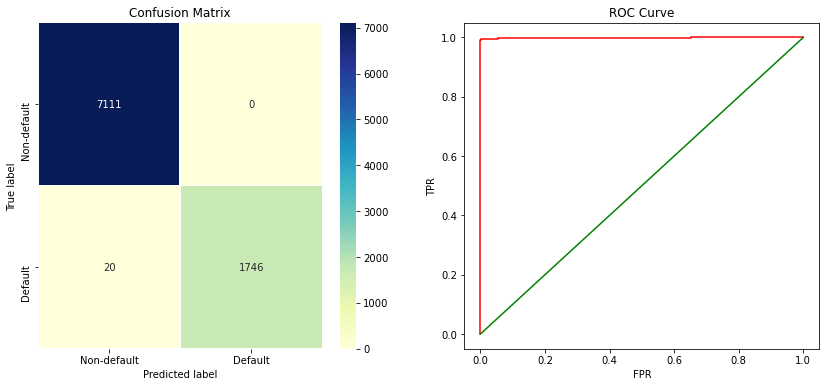

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.3}
[13:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.6586525020967291
Train AUC Score 0.7204240251484328
Overall Test Accuracy 0.6405317111636815
Test AUC Score 0.7089745633589227
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74      7111
         1.0       0.31      0.66      0.42      1766

    accuracy                           0.64      8877
   macro avg       0.60      0.65      0.58      8877
weighted avg       0.

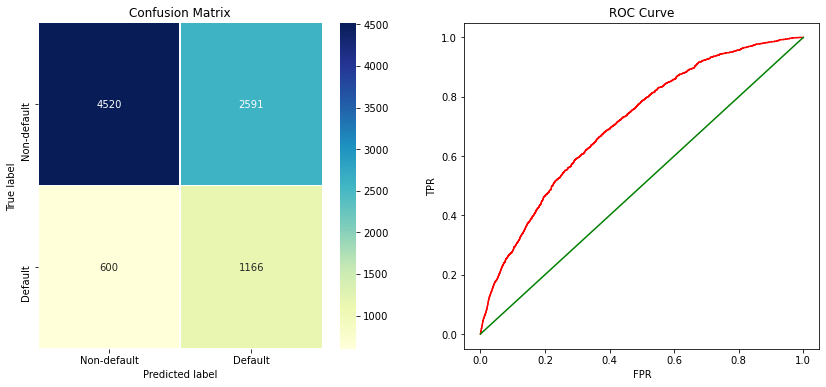

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.5}
[13:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.9404267110002771
Train AUC Score 0.9965638793552126
Overall Test Accuracy 0.7959896361383351
Test AUC Score 0.6852500544273439
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      7111
         1.0       0.44      0.10      0.17      1766

    accuracy                           0.80      8877
   macro avg       0.63      0.54      0.52      8877
weighted avg       0.74      

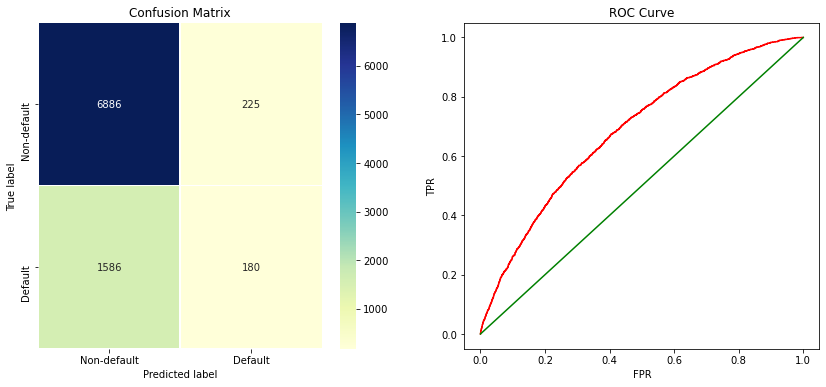

____________________________________________________________


In [30]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_xgb[l])
    model_eval(XGBClassifier(**param_xgb[l]), i,j,X_test,y_test)
    print("_" * 60)

# LGBM

In [74]:
from lightgbm import LGBMClassifier

In [80]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    best_lgb =[]
    print('Data is ',k)  # Instantiate a XGBoost classifier
    lgb= LGBMClassifier()

    param_grid = {"n_estimators"    : np.arange(80,120) ,
                  "max_depth"        : sp_randint(2,20),
                  'learning_rate' : [0.5, 0.75, 1.0],
                  'max_depth': sp_randint(2,20),
                  'min_data_in_leaf':sp_randint(0,20),
                  'num_leaves':sp_randint(150,255)}

    #Building a 5 fold CV RandomizedSearchCV object
    lgb_RS = RandomizedSearchCV(lgb, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    #Fitting the grid to the training data
    lgb_RS.fit(i,j)
    best_lgb.append(lgb_RS.best_params_)
    print("Tuned Light Boost Parameters: {}".format(lgb_RS.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned Light Boost Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'min_data_in_leaf': 17, 'n_estimators': 87, 'num_leaves': 225} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Light Boost Parameters: {'learning_rate': 0.75, 'max_depth': 17, 'min_data_in_leaf': 10, 'n_estimators': 116, 'num_leaves': 215} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Light Boost Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 80, 'num_leaves': 224} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Light Boost Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 113, 'num_leaves': 162} for SMOTE
_____________

In [83]:
param_lgb = [{'learning_rate': 0.5, 'max_depth': 3, 'min_data_in_leaf': 17, 'n_estimators': 87, 'num_leaves': 225},
             {'learning_rate': 0.75, 'max_depth': 17, 'min_data_in_leaf': 10, 'n_estimators': 116, 'num_leaves': 215},
             {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 80, 'num_leaves': 224},
             {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 113, 'num_leaves': 162}
            ]

Data is  Normal Sampling  And with hyper parameter  {'learning_rate': 0.5, 'max_depth': 3, 'min_data_in_leaf': 17, 'n_estimators': 87, 'num_leaves': 225}
[21:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "min_data_in_leaf", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.822948454752261
Train AUC Score 0.798863676170613
Overall Test Accuracy 

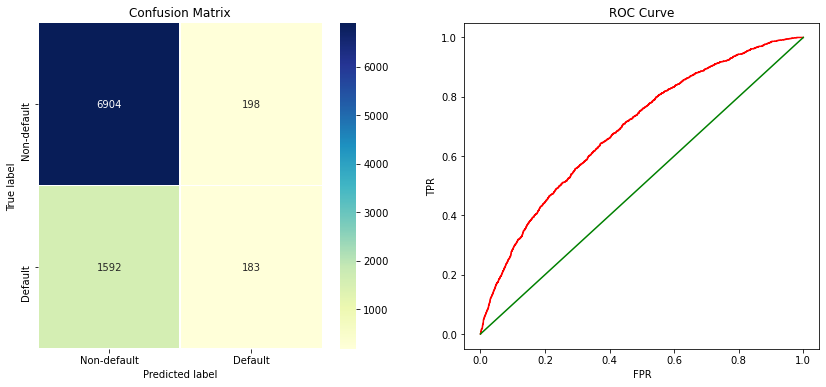

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'learning_rate': 0.75, 'max_depth': 17, 'min_data_in_leaf': 10, 'n_estimators': 116, 'num_leaves': 215}
[21:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "min_data_in_leaf", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 1.0
Train AU

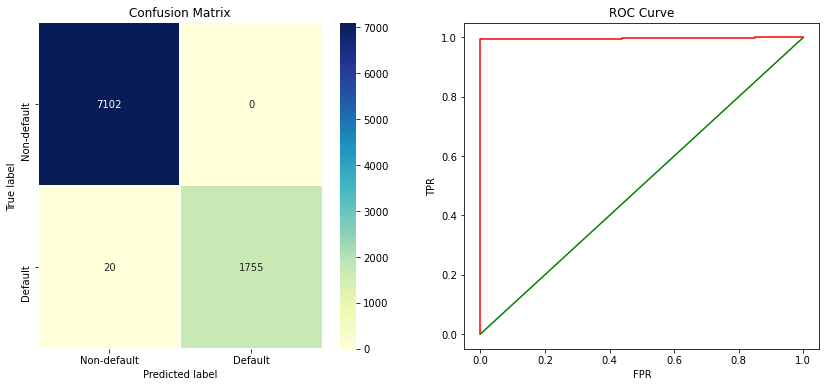

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 80, 'num_leaves': 224}
[21:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "min_data_in_leaf", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.6825027891409

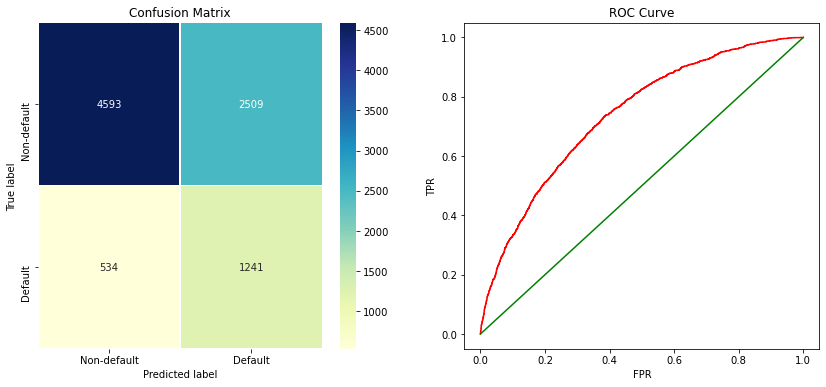

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'learning_rate': 0.5, 'max_depth': 2, 'min_data_in_leaf': 9, 'n_estimators': 113, 'num_leaves': 162}
[21:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "min_data_in_leaf", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.8771844660194175
Trai

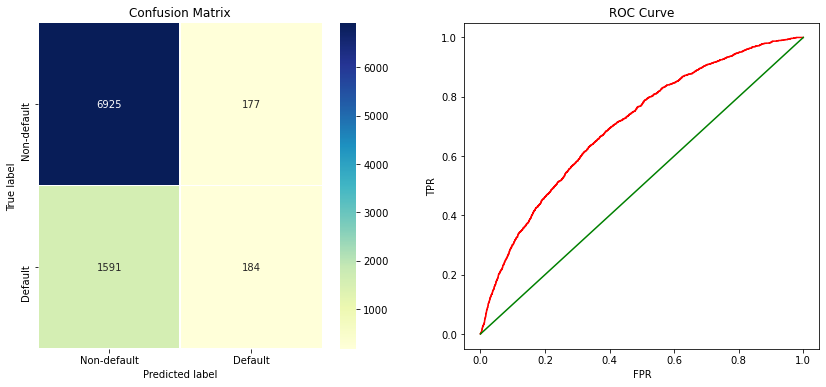

____________________________________________________________


In [84]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_lgb[l])
    model_eval(XGBClassifier(**param_lgb[l]), i,j,X_test,y_test)
    print("_" * 60)

# CATBoost

In [87]:
from catboost import CatBoostClassifier

In [92]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    best_cgb =[]
    print('Data is ',k)  # Instantiate a XGBoost classifier
    cgb= CatBoostClassifier()

    param_grid = {"n_estimators"    : np.arange(80,120),
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV RandomizedSearchCV object
    cgb_RS = RandomizedSearchCV(cgb, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    #Fitting the grid to the training data
    cgb_RS.fit(i,j)
    best_lgb.append(cgb_RS.best_params_)
    print("Tuned Light Boost Parameters: {}".format(cgb_RS.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
0:	learn: 0.5392735	total: 146ms	remaining: 11.5s
1:	learn: 0.4898081	total: 155ms	remaining: 6.04s
2:	learn: 0.4694486	total: 163ms	remaining: 4.2s
3:	learn: 0.4607903	total: 173ms	remaining: 3.29s
4:	learn: 0.4553207	total: 182ms	remaining: 2.73s
5:	learn: 0.4519638	total: 192ms	remaining: 2.36s
6:	learn: 0.4497654	total: 201ms	remaining: 2.1s
7:	learn: 0.4483781	total: 210ms	remaining: 1.89s
8:	learn: 0.4472447	total: 220ms	remaining: 1.74s
9:	learn: 0.4459930	total: 229ms	remaining: 1.61s
10:	learn: 0.4447480	total: 239ms	remaining: 1.5s
11:	learn: 0.4438929	total: 248ms	remaining: 1.4s
12:	learn: 0.4427866	total: 258ms	remaining: 1.33s
13:	learn: 0.4418026	total: 267ms	remaining: 1.26s
14:	learn: 0.4415775	total: 276ms	remaining: 1.19s
15:	learn: 0.4410806	total: 285ms	remaining: 1.14s
16:	learn: 0.4404514	total: 295ms	remaining: 1.09s
17:	learn: 0.4395764	total: 304ms	remaining: 1.05s
18:	learn: 0.4389374	total: 313ms	remaining: 1s
19:	learn: 0.4380820	to

83:	learn: 0.4690647	total: 1.46s	remaining: 607ms
84:	learn: 0.4684436	total: 1.47s	remaining: 588ms
85:	learn: 0.4670145	total: 1.49s	remaining: 571ms
86:	learn: 0.4659646	total: 1.5s	remaining: 553ms
87:	learn: 0.4644713	total: 1.52s	remaining: 535ms
88:	learn: 0.4631778	total: 1.53s	remaining: 517ms
89:	learn: 0.4618908	total: 1.55s	remaining: 499ms
90:	learn: 0.4605693	total: 1.56s	remaining: 482ms
91:	learn: 0.4591020	total: 1.58s	remaining: 465ms
92:	learn: 0.4581088	total: 1.6s	remaining: 447ms
93:	learn: 0.4564466	total: 1.61s	remaining: 429ms
94:	learn: 0.4554405	total: 1.63s	remaining: 412ms
95:	learn: 0.4543308	total: 1.65s	remaining: 395ms
96:	learn: 0.4527349	total: 1.66s	remaining: 377ms
97:	learn: 0.4507907	total: 1.68s	remaining: 360ms
98:	learn: 0.4498775	total: 1.7s	remaining: 343ms
99:	learn: 0.4491226	total: 1.71s	remaining: 325ms
100:	learn: 0.4478579	total: 1.73s	remaining: 308ms
101:	learn: 0.4466358	total: 1.74s	remaining: 291ms
102:	learn: 0.4452834	total: 1.7

40:	learn: 0.2905671	total: 631ms	remaining: 631ms
41:	learn: 0.2902644	total: 646ms	remaining: 615ms
42:	learn: 0.2899934	total: 661ms	remaining: 600ms
43:	learn: 0.2893304	total: 676ms	remaining: 583ms
44:	learn: 0.2887125	total: 690ms	remaining: 568ms
45:	learn: 0.2882869	total: 705ms	remaining: 552ms
46:	learn: 0.2877247	total: 720ms	remaining: 536ms
47:	learn: 0.2875151	total: 733ms	remaining: 519ms
48:	learn: 0.2868149	total: 746ms	remaining: 503ms
49:	learn: 0.2862063	total: 762ms	remaining: 488ms
50:	learn: 0.2855080	total: 778ms	remaining: 473ms
51:	learn: 0.2844739	total: 793ms	remaining: 457ms
52:	learn: 0.2839717	total: 810ms	remaining: 443ms
53:	learn: 0.2830484	total: 826ms	remaining: 428ms
54:	learn: 0.2817183	total: 843ms	remaining: 414ms
55:	learn: 0.2810363	total: 859ms	remaining: 399ms
56:	learn: 0.2803714	total: 874ms	remaining: 383ms
57:	learn: 0.2797173	total: 889ms	remaining: 368ms
58:	learn: 0.2793857	total: 904ms	remaining: 352ms
59:	learn: 0.2787545	total: 918

In [93]:
param_cgb = [{'n_estimators': 80, 'learning_rate': 0.5},{'n_estimators': 119, 'learning_rate': 1.0},
             {'n_estimators': 80, 'learning_rate': 0.5},{'n_estimators': 82, 'learning_rate': 0.5}
            ]

Data is  Normal Sampling  And with hyper parameter  {'n_estimators': 80, 'learning_rate': 0.5}
[23:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.909615491316651
Train AUC Score 0.965942543642357
Overall Test Accuracy 0.7842739664301003
Test AUC Score 0.6582477857853968
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.82      0.94      0.87      7102
         1.0       0.40      0.16      0.23      1775

    accuracy                           0.78      8877
   macro avg       0.61      0.55      0.55      8877
weighted avg       0.73      0.78      0.75      8877

[23:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/le

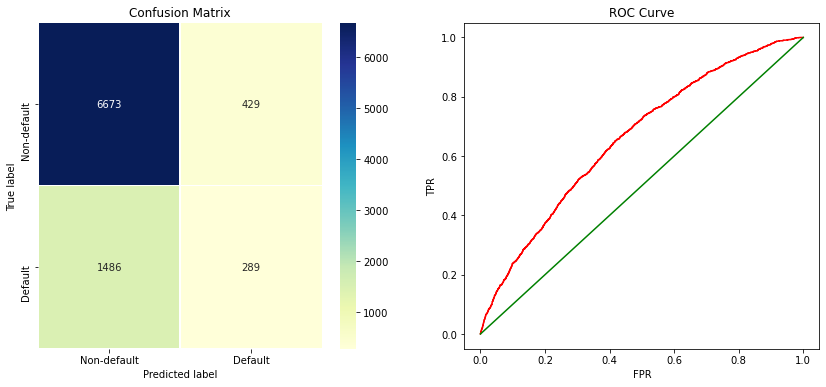

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'n_estimators': 119, 'learning_rate': 1.0}
[23:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.9643155840535266
Train AUC Score 0.9937742100823029
Overall Test Accuracy 0.9466035822913146
Test AUC Score 0.9843779772410866
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      7102
         1.0       0.82      0.95      0.88      1775

    accuracy                           0.95      8877
   macro avg       0.90      0.95      0.92      8877
weighted avg       0.95      0.95      0.95      8877

[23:26:11] WARNING: C:/Us

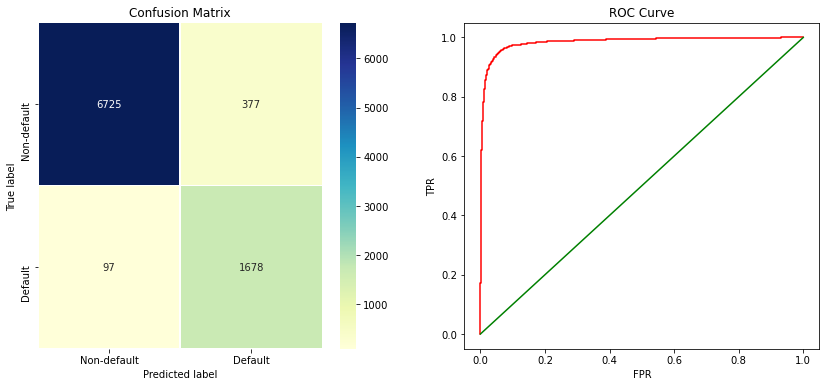

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'n_estimators': 80, 'learning_rate': 0.5}
[23:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.9089810338415768
Train AUC Score 0.9716848949088204
Overall Test Accuracy 0.7281739326348992
Test AUC Score 0.8786027344013391
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.97      0.68      0.80      7102
         1.0       0.42      0.91      0.57      1775

    accuracy                           0.73      8877
   macro avg       0.69      0.80      0.69      8877
weighted avg       0.86      0.73      0.76      8877

[23:26:39] WARNING: C:/Us

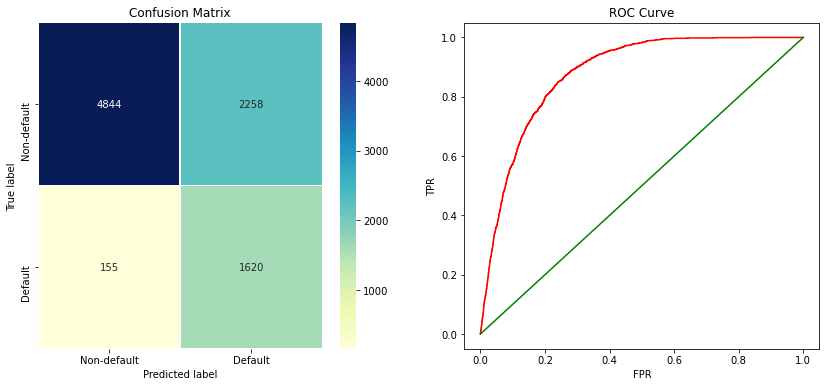

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'n_estimators': 82, 'learning_rate': 0.5}
[23:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Overall Train Accuracy 0.936373092926491
Train AUC Score 0.9869757098805211
Overall Test Accuracy 0.7788667342570689
Test AUC Score 0.6550899766382015
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      7102
         1.0       0.38      0.16      0.23      1775

    accuracy                           0.78      8877
   macro avg       0.60      0.55      0.55      8877
weighted avg       0.73      0.78      0.74      8877

[23:26:51] WARNING: C:/Users/Admini

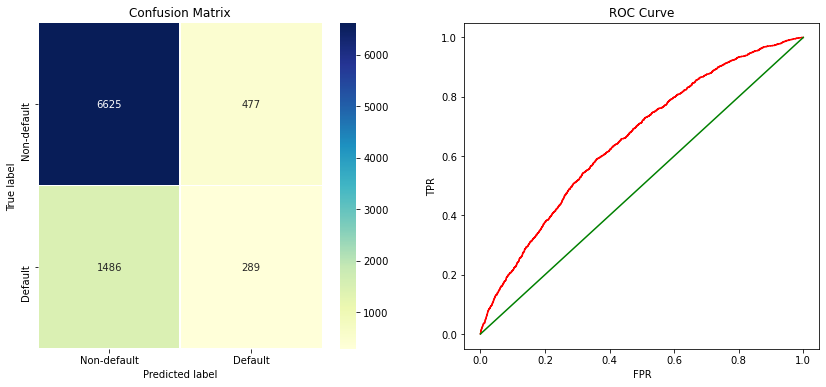

____________________________________________________________


In [94]:
xtrain_data = [X_train,df_upsampled.drop('target',axis = 1),df_downsampled.drop('target',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['target'],df_downsampled['target'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_cgb[l])
    model_eval(XGBClassifier(**param_cgb[l]), i,j,X_test,y_test)
    print("_" * 60)

# Conclusion

In [1]:
import pandas as pd


In [21]:
dic = {'Model':['Logistic Regression','KNN','Random forest','Ada Boost','Gradient Boost','Decision Tree','XGBoost','LightGBM','CATBoost'],
       'Data':['Under Sampling','Over Sampling','Over Sampling','Normal Sampling','Over Sampling','Over Sampling','Over Sampling','Over Sampling','Over Sampling'],
       'F1-Score':[0.68,1.00,0.71,0.80,0.81,0.84,1.00,1.00,0.95],
       'Accuracy':[0.71,0.99,0.71,0.80,0.80,0.84,0.99,0.99,0.94],
       'K-Fold score':[0.64,0.88,0.71,0.51,0.76,0.77,0.931,0.922,0.859],
       'AUC-ROC Score':[0.71,0.99,0.81,0.69,0.88,0.94,0.99,0.99,0.98]}
score_df = pd.DataFrame(dic)
fig =  ff.create_table(score_df)
fig.show()

In [23]:
score_df.to_csv('dic.csv')

# feature selection

In [40]:
df_upsampled.drop('target',axis = 1).shape

(43069, 13)

In [42]:
df_upsampled.target.shape

(43069,)

In [34]:
def plot_Feature(feature, clf):
    tmp = pd.DataFrame({'Feature': feature, 
                        'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    fig = go.Figure(go.Bar(
    x=tmp['Feature'],y=tmp['Feature importance'],marker={'color': tmp['Feature importance'], 
    'colorscale': 'Viridis'}
    ))
    fig.update_layout(title_text='Feature Importance',xaxis_title="Feature",yaxis_title="Importance")
    return fig.show()

In [44]:
param_r = {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4}
rfc_s = XGBClassifier(**param_r,random_state=8).fit(df_upsampled.drop('target',axis = 1),df_upsampled.target)

[13:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
plot_Feature(df_upsampled.drop('target',axis = 1).columns,rfc_s)

# Interpretations

In [19]:
import shap

In [21]:
param_r = {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.4,}
cls = XGBClassifier(**param_r,random_state=8).fit(df_upsampled.drop('target',axis = 1),df_upsampled.target)

[13:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


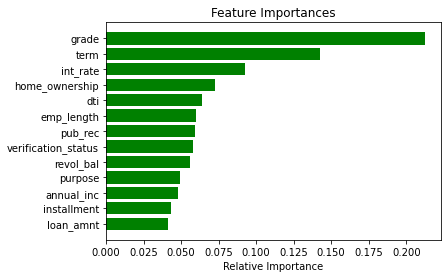

In [23]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
# compute SHAP values
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(df_upsampled.drop('target',axis = 1))

In [67]:
explainer.expected_value

-0.029470121

In [34]:
class_names=[0,1]

# Summary Plot

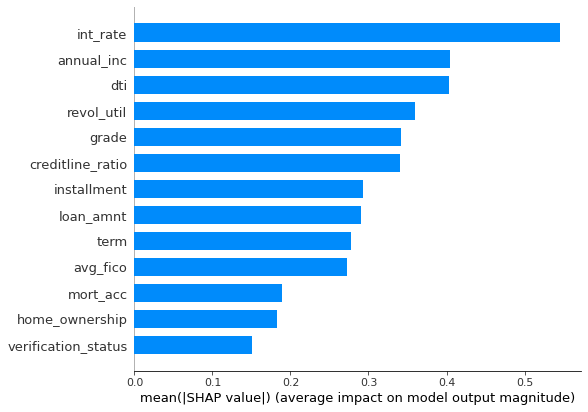

In [73]:
shap.summary_plot(shap_values, df_upsampled.drop('target',axis = 1).values, plot_type="bar",class_names=['0','1'],
                  feature_names = df_upsampled.drop('target',axis = 1).columns
                 )

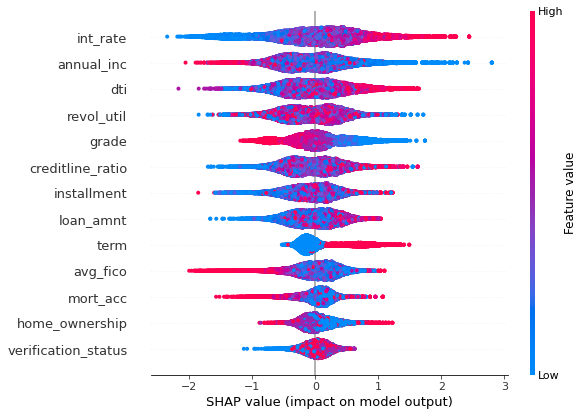

In [40]:
shap.summary_plot(shap_values, df_upsampled.drop('target',axis = 1).values, 
                  feature_names = df_upsampled.drop('target',axis = 1).columns)

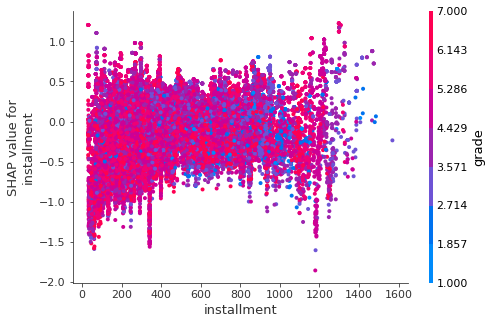

In [72]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(3, shap_values, df_upsampled.drop('target',axis = 1).values, feature_names=df_upsampled.drop('target',axis = 1).columns)

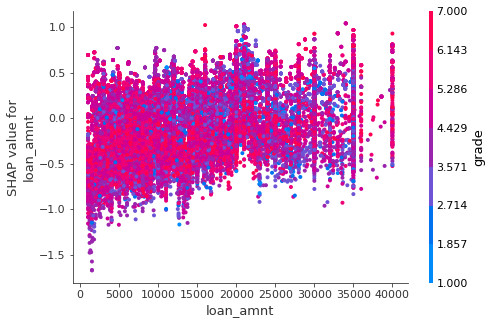

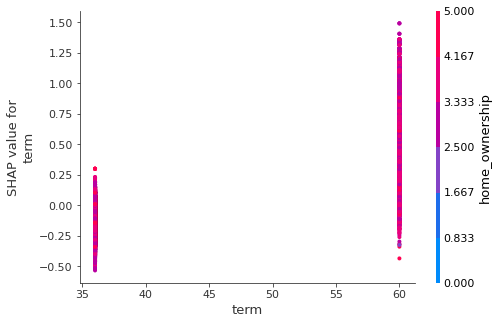

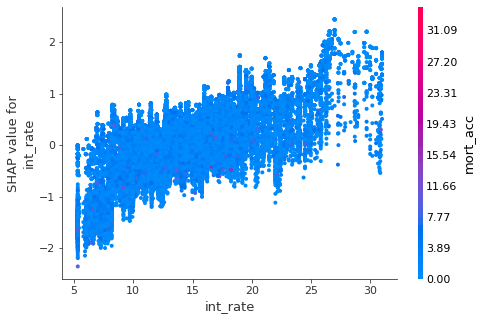

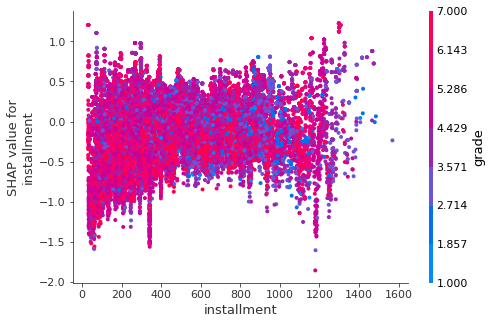

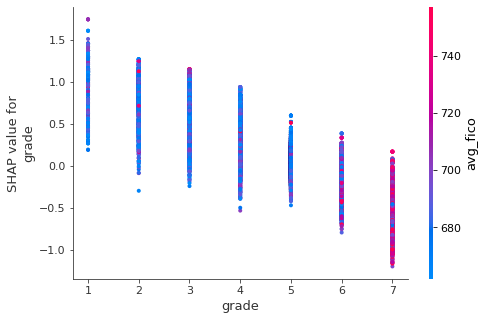

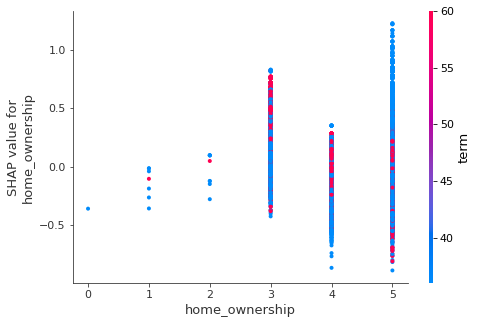

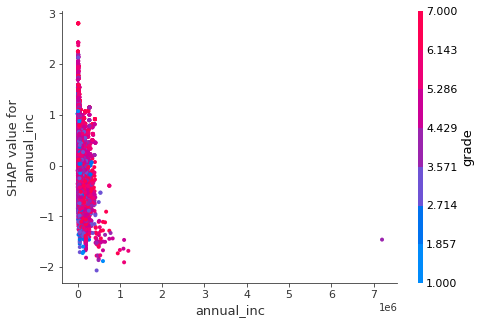

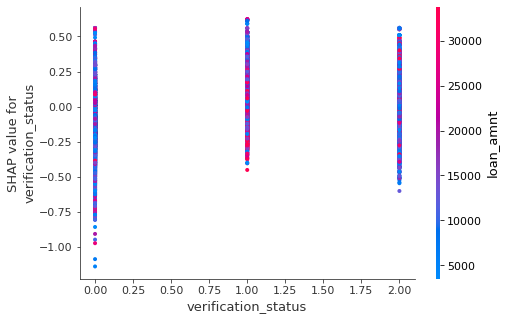

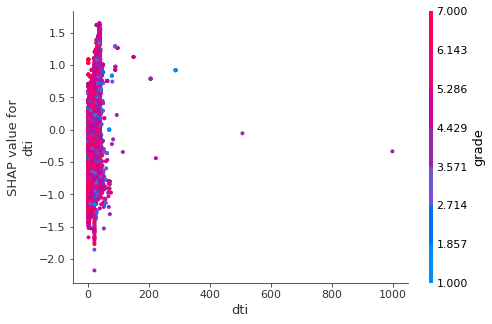

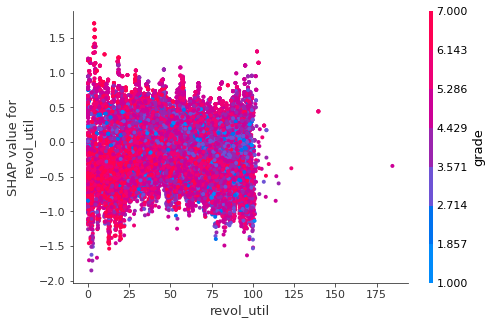

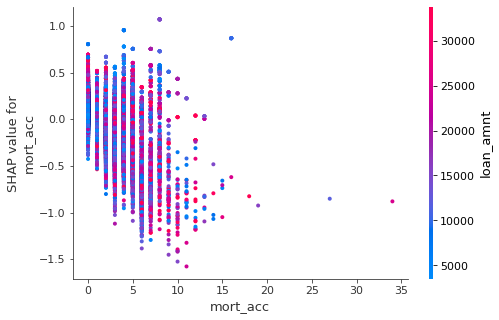

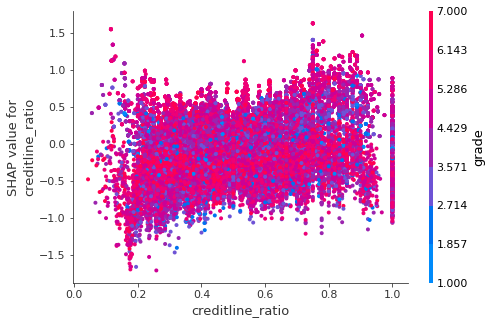

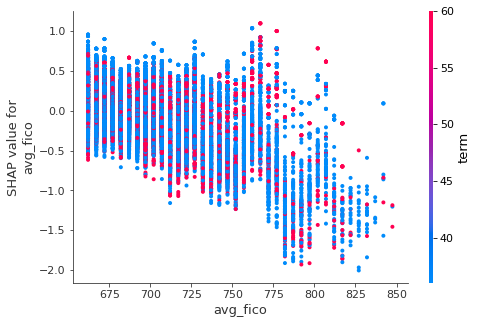

In [70]:
for name in df_upsampled.drop('target',axis = 1).columns:
    shap.dependence_plot(name, shap_values, df_upsampled.drop('target',axis = 1))